In [1]:
path='data/resampled_dataset.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

In [3]:
#Load dataset
df = pd.read_csv(path)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,286370,2,2,80,266,40,40,40.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,53,741,2,2,54,178,27,27,27.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,53,31410,2,2,60,174,30,30,30.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,53551,4748,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,443,5661084,7,4,635,168,517,0,90.714286,190.707205,...,32,153901.0,0.0,153901,153901,5507135.0,0.0,5507135,5507135,BENIGN


In [4]:
df.shape

(746117, 79)

In [5]:
df.describe()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,746117.000000,7.461170e+05,746117.000000,746117.000000,7.461170e+05,7.461170e+05,746117.000000,746117.000000,746117.000000,746117.000000,...,746117.000000,7.461170e+05,7.461170e+05,7.461170e+05,7.461170e+05,7.461170e+05,7.461170e+05,7.461170e+05,7.461170e+05,7.461170e+05
mean,5195.159152,2.214381e+07,7.664345,8.040212,3.897068e+02,1.392028e+04,165.624361,10.679005,43.385936,59.359873,...,3.998023,-1.412403e+03,9.285406e+04,3.060680e+04,1.367981e+05,7.423070e+04,1.764452e+07,1.009668e+06,1.841303e+07,1.690483e+07
std,14144.686896,3.898666e+07,673.933537,877.181297,6.668536e+03,2.130323e+06,579.066493,55.480015,154.968748,226.631737,...,536.762287,8.789839e+05,6.836524e+05,3.546173e+05,9.355221e+05,6.322933e+05,3.457368e+07,6.819789e+06,3.546375e+07,3.438408e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,6.500000e+01,1.000000,1.000000,2.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,4.823000e+04,2.000000,2.000000,3.100000e+01,9.900000e+01,20.000000,0.000000,8.666667,0.000000,...,1.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,445.000000,1.134768e+07,6.000000,5.000000,3.170000e+02,1.159500e+04,274.000000,6.000000,47.750000,89.882516,...,2.000000,3.200000e+01,1.770000e+02,0.000000e+00,1.770000e+02,1.070000e+02,9.367733e+06,0.000000e+00,9.720346e+06,7.230865e+06
max,65529.000000,1.200000e+08,206446.000000,276072.000000,2.321478e+06,6.270000e+08,24820.000000,2065.000000,5940.857143,7049.469004,...,192326.000000,1.380000e+02,1.030000e+08,4.230000e+07,1.030000e+08,1.030000e+08,1.200000e+08,7.350000e+07,1.200000e+08,1.200000e+08


In [6]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [7]:
df.isnull().sum()
df.isna().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [8]:
df['Label'].value_counts()

Label
BENIGN                        300000
DoS Hulk                      184858
PortScan                      127144
DDoS                          102422
DoS GoldenEye                   8234
FTP-Patator                     6350
SSH-Patator                     4718
DoS slowloris                   4637
DoS Slowhttptest                4399
Bot                             1573
Web Attack � Brute Force        1205
Web Attack � XSS                 522
Infiltration                      29
Web Attack � Sql Injection        17
Heartbleed                         9
Name: count, dtype: int64

In [9]:
# Define mapping dictionary
label_mapping = {
    'BENIGN': 'Benign Traffic',
    'DoS Hulk': 'DoS Attacks',
    'DoS GoldenEye': 'DoS Attacks',
    'DoS slowloris': 'DoS Attacks',
    'DoS Slowhttptest': 'DoS Attacks',
    'DDoS': 'DDoS Attacks',
    'PortScan': 'Port Scanning & Brute Force',
    'FTP-Patator': 'Port Scanning & Brute Force',
    'SSH-Patator': 'Port Scanning & Brute Force',
    'Web Attack – Brute Force': 'Web-Based Attacks',
    'Web Attack – XSS': 'Web-Based Attacks',
    'Web Attack – Sql Injection': 'Web-Based Attacks',
    'Bot': 'Other Exploits & Infiltrations',
    'Infiltration': 'Other Exploits & Infiltrations',
    'Heartbleed': 'Other Exploits & Infiltrations'
}

# Apply mapping to create a new column with grouped labels
df['Label'] = df['Label'].map(label_mapping)
df['Label'].value_counts()


Label
Benign Traffic                    300000
DoS Attacks                       202128
Port Scanning & Brute Force       138212
DDoS Attacks                      102422
Other Exploits & Infiltrations      1611
Name: count, dtype: int64

In [10]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [11]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the grouped labels
df['Label'] = label_encoder.fit_transform(df['Label'])

In [12]:
df['Label'].value_counts()

Label
0    300000
2    202128
4    138212
1    102422
5      1744
3      1611
Name: count, dtype: int64

In [13]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
df.fillna(df.median(), inplace=True)  # Replace NaN with max finite value


<Axes: title={'center': 'Count (target)'}, xlabel='Label'>

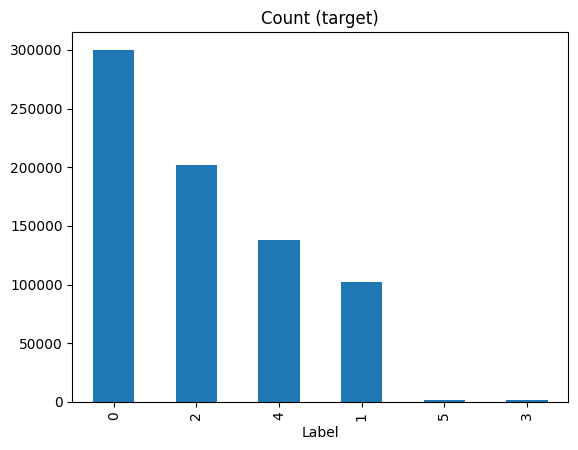

In [14]:
df['Label'].value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
X = df.drop(columns=['Label'])
y = df['Label']
#Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy={0: 220000}, random_state=42)
X, y = undersampler.fit_resample(X, y)



<Axes: title={'center': 'Count (target)'}, xlabel='Label'>

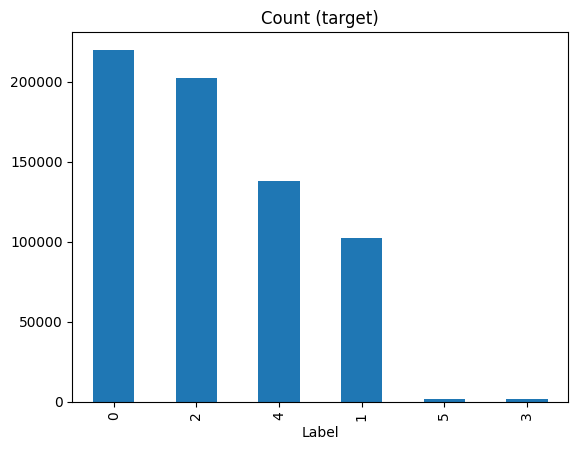

In [ ]:
#Plot the count 
pd.Series(y).value_counts().plot(kind='bar',title='Count (target)')

In [17]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Reshape for CNN-LSTM input
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
y_encoded = to_categorical(y)

In [ ]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)



In [20]:
# Define CNN-LSTM Model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(50, return_sequences=True, dropout=0.3, recurrent_dropout=0.3),
    LSTM(50, dropout=0.3, recurrent_dropout=0.3),

    Dense(50, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),

    Dense(y_encoded.shape[1], activation='softmax')  # Adjust based on label encoding
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 76, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 38, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 38, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 36, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 18, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 18, 50)         │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,392 (204.66 KB)

 Trainable params: 52,392 (204.66 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
16653/16653 ━━━━━━━━━━━━━━━━━━━━ 166s 10ms/step - accuracy: 0.4979 - loss: 1.3625 - val_accuracy: 0.7786 - val_loss: 0.6850
Epoch 2/50
16653/16653 ━━━━━━━━━━━━━━━━━━━━ 163s 10ms/step - accuracy: 0.7244 - loss: 0.7741 - val_accuracy: 0.7900 - val_loss: 0.5752
Epoch 3/50
16653/16653 ━━━━━━━━━━━━━━━━━━━━ 163s 10ms/step - accuracy: 0.7741 - loss: 0.6651 - val_accuracy: 0.8141 - val_loss: 0.5204
Epoch 4/50
16653/16653 ━━━━━━━━━━━━━━━━━━━━ 161s 10ms/step - accuracy: 0.7954 - loss: 0.6041 - val_accuracy: 0.8305 - val_loss: 0.4754
Epoch 5/50
16653/16653 ━━━━━━━━━━━━━━━━━━━━ 162s 10ms/step - accuracy: 0.8087 - loss: 0.5618 - val_accuracy: 0.8420 - val_loss: 0.4647
Epoch 6/50
16653/16653 ━━━━━━━━━━━━━━━━━━━━ 164s 10ms/step - accuracy: 0.8194 - loss: 0.5324 - val_accuracy: 0.8475 - val_loss: 0.4173
Epoch 7/50
16653/16653 ━━━━━━━━━━━━━━━━━━━━ 178s 11ms/step - accuracy: 0.8404 - loss: 0.4944 - val_accuracy: 0.8713 - val_loss: 0.3796
Epoch 8/50
16653/16653 ━━━━━━━━━━━━━━━━━━━━ 171s 10ms/s

In [24]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))


4164/4164 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     44002
           1       0.99      0.98      0.99     20304
           2       0.94      0.99      0.97     40501
           3       0.00      0.00      0.00       334
           4       0.93      0.98      0.96     27746
           5       0.70      0.08      0.14       337

    accuracy                           0.96    133224
   macro avg       0.76      0.66      0.66    133224
weighted avg       0.95      0.96      0.95    133224

[[40066   132  2105     0  1689    10]
 [    3 19953   343     0     5     0]
 [  162    65 40177     0    96     1]
 [  224     0     2     0   108     0]
 [  482     0    26     0 27238     0]
 [  292     0     3     0    16    26]]


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

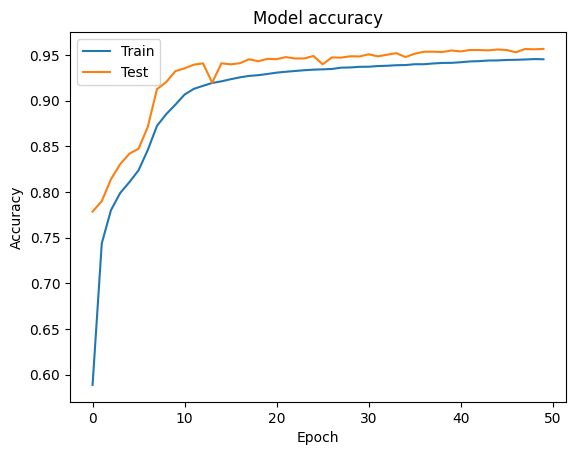

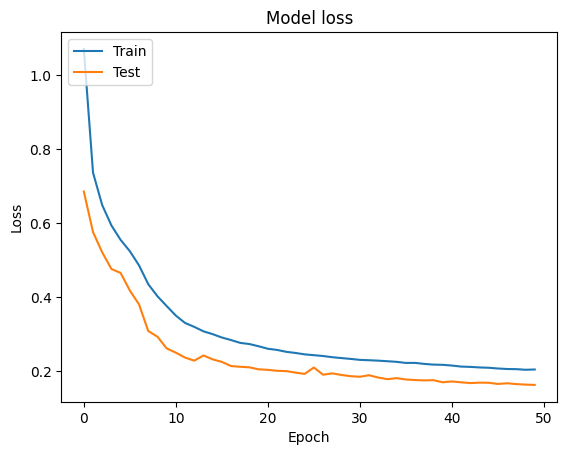

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')

plt.ylabel('Loss')

plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Save the model

model.save('models/cnnlstm_model.h5')



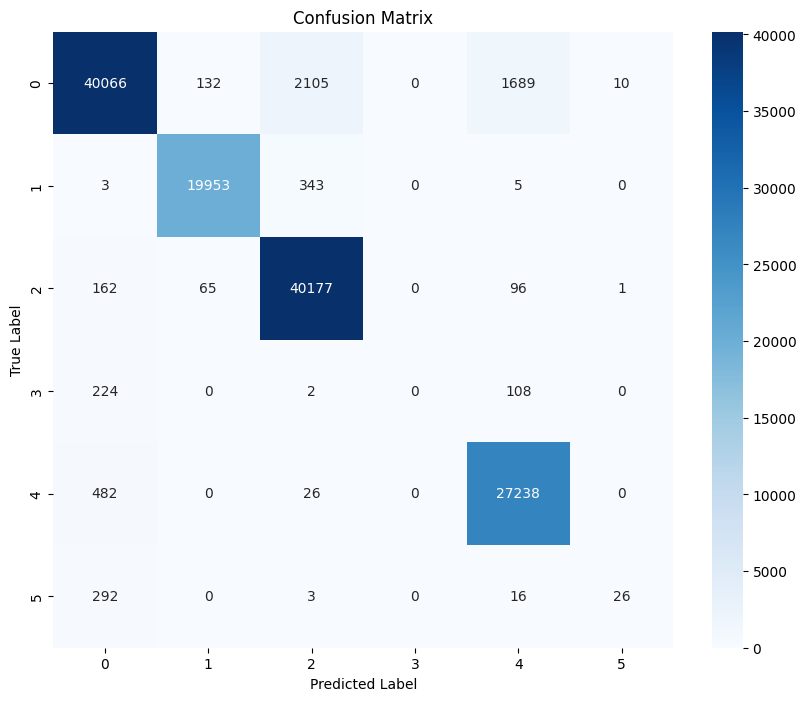

In [27]:

# plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

plt.title("Confusion Matrix")

plt.ylabel("True Label")

plt.xlabel("Predicted Label")

plt.show()